## Part 1: Home Court Advantage
For the first part of this project, I wish to test whether there truly is what is called "home court advantage" in professional basketball. I start by taking a dataset containing the NBA finals champions and filtering to just contain the years 2010 - 2018 and removed missing values. I then added two new columns, one to indicate whether a team won at home, one to indicate whether a team won at away. These columns took a 1 or 0 value, 1 to indicate a win and 0 to indicate a loss. Now that the dataset is cleaned and prepared, I can create the interactive dashboard. 

In [1]:
# Import required libraries
import pandas as pd
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px
import matplotlib.pyplot as plt

#Read the data into pandas dataframe
first_df = pd.read_csv("/Users/maggie/championsdata.csv")

max_court_home = first_df['Home'].max()
min_court_away = first_df['Home'].min()

In [2]:
# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('NBA Finals Home Game Advantage Dashboard: 2010 - 2018',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable year selection
                                # The default select value is for ALL teams
                                dcc.Dropdown(
                                    id='team-dropdown',
                                    options=[
                                        {'label': 'All Champion Teams', 'value': 'ALL'},
                                        {'label': 'Lakers', 'value': 'Lakers'},
                                        {'label': 'Mavericks', 'value': 'Mavericks'},
                                        {'label': 'Heat', 'value': 'Heat'},
                                        {'label': 'Spurs', 'value': 'Spurs'},
                                        {'label': 'Warriors', 'value': 'Warriors'},
                                        {'label': 'Cavaliers', 'value': 'Cavaliers'},
                                    ],
                                    value='ALL',
                                    placeholder='Select a champion team here',
                                    searchable=True
                                    ),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total home court wins count for all teams
                                # If a specific team was selected, show the Win vs. Loss counts for the team at home
                                html.Div(dcc.Graph(id='at-home-win-pie-chart')),
                                html.Br(),
                                
                                # TASK 3: Add a pie chart to show the total away court wins count for all teams
                                # If a specific team was selected, show the Win vs. Loss counts for the team at away
                                html.Div(dcc.Graph(id='at-away-win-pie-chart')),
                                html.Br(),

                                ])

# TASK 2:
# Add a callback function for `team-dropdown` as input, `at-home-win-pie-chart` as output

@app.callback( Output(component_id='at-home-win-pie-chart', component_property='figure'),
               Input(component_id='team-dropdown', component_property='value'))

def get_pie_chart(entered_team):
    filtered_df = first_df
    if entered_team == 'ALL':
        fig = px.pie(first_df, values='Win At Home', names='Team', title='Total Home Court Wins By Team')
        return fig
    else:
        # return the outcomes piechart for a selected team
        filtered_df = first_df[first_df['Team'] == entered_team]
        filtered_df = filtered_df.groupby(['Team', 'Win At Home']).size().reset_index(name='win_count')
        fig = px.pie(filtered_df, values='win_count', names='Win At Home', title=f"Total Home Game Wins for Team {entered_team}")
        return fig

# TASK 3:
# Add a callback function for `team-dropdown` as input, `at-away-win-pie-chart` as output

@app.callback( Output(component_id='at-away-win-pie-chart', component_property='figure'),
               Input(component_id='team-dropdown', component_property='value'))

def get_pie_chart(entered_team):
    filtered_df = first_df
    if entered_team == 'ALL':
        fig = px.pie(first_df, values='Win At Away', names='Team', title='Total Away Court Wins By Team')
        return fig
    else:
        # return the outcomes piechart for a selected team
        filtered_df = first_df[first_df['Team'] == entered_team]
        filtered_df = filtered_df.groupby(['Team', 'Win At Away']).size().reset_index(name='win_count')
        fig = px.pie(filtered_df, values='win_count', names='Win At Away', title=f"Total Away Game Wins for Team {entered_team}")
        return fig

    
# Run the app
if __name__ == '__main__':
    app.run_server()

The first graph shows the percentages of home court wins for all NBA Finals champions, which can be filtered based on team to see more specific results. The second graph shows the percentages of away court wins for all NBA Finals champions, which can be filtered as well. By comparing both graphs, there does seem to be a difference in playing at a team's home court vs. an away court for the NBA finals. It is clear that NBA teams generally perform better when playing at home. The difference in win percentages between home and away games strongly supports the idea of "home-court advantage" in professional basketball. This trend highlights the psychological and environmental benefits of playing on familiar ground.

## Part 2: Evolution of Basketball
The next part of this project is an analysis on All Star players' regular season statistics. Based on the evolution of modern basketball, games tend to be more high scoring nowadays than they were decades ago. Thus, All Star selected players should be averaging higher stats in the regular seasons. To test this theory, I found a dataset containing every All Star selected from the years 1980 to 2022. I chose to analyze only All Stars because I believe they are an accurate representation of the best players in the NBA. To simplify this analysis, I selected rows only from the year 2000 on. I then filtered out the dataset to keep only the columns I deemed relevant for this project. This set my dataset up for analysis. 

In [3]:
#Import data
second_df = pd.read_csv("/Users/maggie/final_data.csv")
new_df = second_df[second_df['year']>1999]
new_df = new_df[['first','last','year','pts','reb','ast','stl','blk','turnover','fg_pct']]

In [4]:
new_df.head()

,first,last,year,pts,reb,ast,stl,blk,turnover,fg_pct
454,Allen,Iverson,2000,31.08,3.85,4.58,2.51,0.28,3.34,0.420
455,Vince,Carter,2000,27.60,5.55,3.88,1.52,1.09,2.23,0.460
456,Tracy,McGrady,2000,26.82,7.53,4.57,1.51,1.53,2.57,0.457
457,Antonio,Davis,2000,13.71,10.09,1.36,0.28,1.94,1.73,0.433
458,Anthony,Mason,2000,16.13,9.63,3.10,1.00,0.31,2.24,0.482


In [5]:
#View data types
print(new_df.dtypes)

first        object
last         object
year          int64
pts         float64
reb         float64
ast         float64
stl         float64
blk         float64
turnover    float64
fg_pct      float64
dtype: object


In [6]:
stats_df = pd.DataFrame()

#Group columns by year and adjust fg_pct
for column in new_df:
    if column != 'first' and column != 'last' and column != 'year':
        new_column = new_df.groupby('year')[column].mean()
        if column == 'fg_pct':
            new_column = new_column * 100
        stats_df[f'avg_{column}'] = new_column
        
stats_df.head()

,avg_pts,avg_reb,avg_ast,avg_stl,avg_blk,avg_turnover,avg_fg_pct
year,,,,,,,
2000,21.262917,7.467917,4.074167,1.238750,1.050833,2.628333,46.308333
2001,21.296087,7.627391,4.612609,1.300870,0.983913,2.750000,46.230435
2002,21.195833,7.645417,4.479583,1.376250,1.035000,2.600833,46.037500
2003,20.145000,7.655000,4.182500,1.372083,1.154167,2.675417,45.204167
2004,22.002083,7.422500,4.023333,1.290000,1.091667,2.622083,47.512500


<Figure size 1000x1000 with 0 Axes>

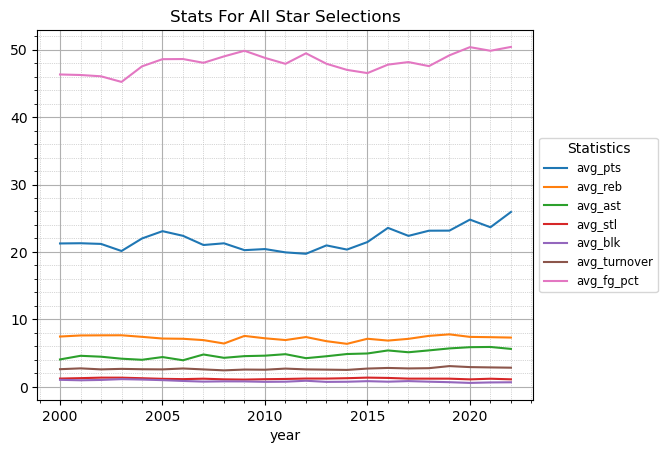

In [7]:
#Graph the results
plt.figure(figsize = (10, 10))
stats_df.plot(kind = 'line', title = 'Stats For All Star Selections')
plt.xlabel = 'Year'
plt.legend(title = 'Statistics', loc = 'center left', bbox_to_anchor = (1, 0.5), fontsize = 'small')
plt.minorticks_on()
plt.grid(which = 'both', axis='both')
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5)
plt.show()

Based on the results of the graph, we can clearly see that there has been an increase in the average number of points scored and the average field goal percentage in the past two decades. This would support my hypothesis that All Star players should have more points in the regular season. However, almost every other statistics remained constant, supporting the idea that the only major difference in the evolution of basketball is the amount of points scored and any other statistic that is directly related to this statistic. This increase can most likely be attributed to the fact that in modern basketball, more players have begun to shoot 3 pointers, which attributes to more points per made field goal attempt. One way I could further confirm this analysis in the future is to analyze whether the percentage of three point attempts has increased, as well as the percentage of three pointers made. 